In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(x_train[..., np.newaxis], y_train, epochs=10, batch_size=64,
                    validation_data=(x_test[..., np.newaxis], y_test),
                    callbacks=[ReduceLROnPlateau(factor=0.5, patience=2, verbose=1)])

Epoch 1/10


938/938 [==============================] - 20s 19ms/step - loss: 0.1778 - accuracy: 0.9503 - val_loss: 0.0741 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 2/10
938/938 [==============================] - 19s 21ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0574 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 3/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0473 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 4/10
938/938 [==============================] - 19s 21ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0440 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 5/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0407 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 6/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0410 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 7/10
937/938 [============================>.] - ET

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test[..., np.newaxis], y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9882
Test accuracy: 0.9882


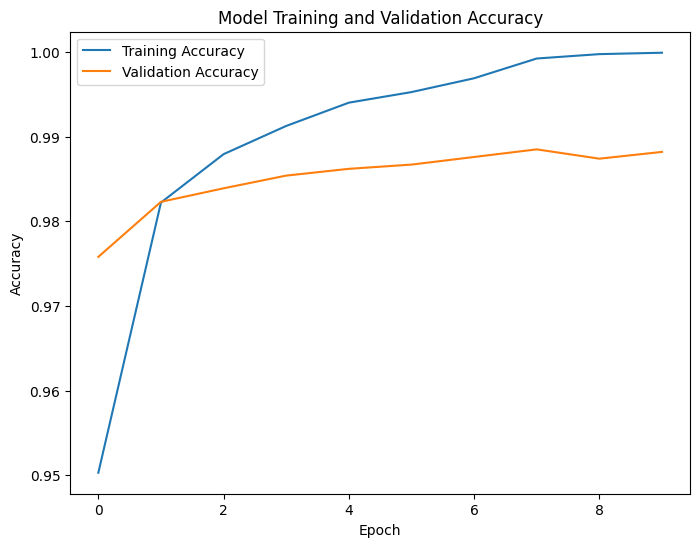

In [7]:
# Visualize training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()